# Análisis EDA 

### Importación de librerias

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json as js
import ast 
import re

### Carga de datos

In [4]:
df1_games = pd.read_json('/Users/carolina/Desktop/Data/Henry - Data Science/M7/Proyecto Individual 1/steam_games.json',lines=True)


In [5]:
list_reviews = [] #Este código está diseñado para leer un archivo JSON línea por línea, convertir cada línea en un diccionario Python y luego agregarlo a una lista llamada list_reviews
archivo3 = r'/Users/carolina/Desktop/Data/Henry - Data Science/M7/Copia de Proyecto Individual 1/user_reviews.json'
with open(archivo3, encoding='utf-8') as file2:
    for line2 in file2.readlines():
        list_reviews.append(ast.literal_eval(line2))
it2= pd.DataFrame(list_reviews)
df3_reviews = it2

In [6]:
list_items = []  #Este código está diseñado para leer un archivo JSON línea por línea, convertir cada línea en un diccionario Python y luego agregarlo a una lista llamada list_items
archivo2 = r'/Users/carolina/Desktop/Data/Henry - Data Science/M7/Proyecto Individual 1/users_items.json'
with open(archivo2, encoding='utf-8') as file2:
    for line2 in file2.readlines():
        list_items.append(ast.literal_eval(line2))

it1 = pd.DataFrame(list_items)
df2_items = it1

### Verificación las primeras filas de cada DataFrame

In [10]:
print(df1_games.head())
print(df3_reviews.head())
print(df2_items.head())

  publisher genres app_name title   url release_date  tags reviews_url specs  \
0      None   None     None  None  None         None  None        None  None   
1      None   None     None  None  None         None  None        None  None   
2      None   None     None  None  None         None  None        None  None   
3      None   None     None  None  None         None  None        None  None   
4      None   None     None  None  None         None  None        None  None   

  price  early_access  id developer  
0  None           NaN NaN      None  
1  None           NaN NaN      None  
2  None           NaN NaN      None  
3  None           NaN NaN      None  
4  None           NaN NaN      None  
             user_id                                           user_url  \
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...   
1            js41637               http://steamcommunity.com/id/js41637   
2          evcentric             http://steamcommunity.com/id/evce

### Desanidación de listas en df3 y df2

In [7]:
# Convertir la columna 'reviews' en listas de diccionarios en el DataFrame original
df3_reviews['reviews'] = df3_reviews['reviews'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
duplicate_index = df3_reviews.index.duplicated()
if duplicate_index.any():
    df3_reset = df3_reviews.reset_index(drop=True)
df3_reviews['reviews'] = df3_reviews['reviews'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
# Explota las reseñas en el mismo DataFrame original 
df_exploded = df3_reviews.explode('reviews')
# Normaliza la columna 'items' en el DataFrame original
df3_reviews = pd.json_normalize(df_exploded['reviews'])
df3_reviews.reset_index(drop=True, inplace=True)
df_final_reviews = pd.concat([df_exploded.drop(columns=['reviews']).reset_index(drop=True), df3_reviews], axis=1)
print(df_final_reviews.head())
df_final_reviews
df3_reviews= df_final_reviews

             user_id                                           user_url funny  \
0  76561197970982479  http://steamcommunity.com/profiles/76561197970...         
1  76561197970982479  http://steamcommunity.com/profiles/76561197970...         
2  76561197970982479  http://steamcommunity.com/profiles/76561197970...         
3            js41637               http://steamcommunity.com/id/js41637         
4            js41637               http://steamcommunity.com/id/js41637         

                      posted last_edited item_id  \
0   Posted November 5, 2011.                1250   
1      Posted July 15, 2011.               22200   
2     Posted April 21, 2011.               43110   
3      Posted June 24, 2014.              251610   
4  Posted September 8, 2013.              227300   

                                           helpful recommend  \
0                                   No ratings yet      True   
1                                   No ratings yet      True   
2       

In [8]:

# Convertir la columna 'items' en listas de diccionarios en el DataFrame original
df2_items['items'] = df2_items['items'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
# Explota las reseñas en el mismo DataFrame original 
df2_exploded = df2_items.explode('items')
# Normaliza la columna 'items' en el DataFrame original
df_items = pd.json_normalize(df2_items['items'])

# Restablece el índice del DataFrame original
df2_items.reset_index(drop=True, inplace=True)
df2_items.reset_index(drop=True, inplace=True)

# Combina las columnas normalizadas con el DataFrame original
df2 = pd.concat([df2_items.drop(columns=['items']), df2_items], axis=1)
print(df2_items.head())


             user_id  items_count           steam_id  \
0  76561197970982479          277  76561197970982479   
1            js41637          888  76561198035864385   
2          evcentric          137  76561198007712555   
3         Riot-Punch          328  76561197963445855   
4              doctr          541  76561198002099482   

                                            user_url  \
0  http://steamcommunity.com/profiles/76561197970...   
1               http://steamcommunity.com/id/js41637   
2             http://steamcommunity.com/id/evcentric   
3            http://steamcommunity.com/id/Riot-Punch   
4                 http://steamcommunity.com/id/doctr   

                                               items  
0  [{'item_id': '10', 'item_name': 'Counter-Strik...  
1  [{'item_id': '10', 'item_name': 'Counter-Strik...  
2  [{'item_id': '1200', 'item_name': 'Red Orchest...  
3  [{'item_id': '10', 'item_name': 'Counter-Strik...  
4  [{'item_id': '300', 'item_name': 'Day of Defea..

### Verificación de valores nulos de cada DataFrame

In [11]:
print(df1_games.isnull().sum())
print(df3_reviews.isnull().sum())
print(df2_items.isnull().sum())

publisher       96362
genres          91593
app_name        88312
title           90360
url             88310
release_date    90377
tags            88473
reviews_url     88312
specs           88980
price           89687
early_access    88310
id              88312
developer       91609
dtype: int64
user_id     0
user_url    0
reviews     0
dtype: int64
user_id        0
items_count    0
steam_id       0
user_url       0
items          0
dtype: int64


### Verificación de valores duplicados de cada DataFrame

In [ ]:
df1_games.duplicated().sum()
df3_reviews.duplicated().sum()
df2_items.duplicated().sum()


### Análisis de valores faltantes

In [10]:
df1_games.isnull().mean() * 100
df3_reviews.isnull().mean() * 100
df2_items.isnull().mean() * 100

user_id        0.0
items_count    0.0
steam_id       0.0
user_url       0.0
items          0.0
dtype: float64

### Identificación de los Tipos de datos de cada Dataframe

In [17]:
print(df1_games.dtypes)
print(df3_reviews.dtypes)
print(df2_items.dtypes)

publisher        object
genres           object
app_name         object
title            object
url              object
release_date     object
tags             object
reviews_url      object
specs            object
price            object
early_access    float64
id              float64
developer        object
dtype: object
user_id     object
user_url    object
reviews     object
dtype: object
user_id        object
items_count     int64
steam_id       object
user_url       object
items          object
dtype: object


### Análisis estadistico

In [ ]:
df1_games.describe()
df3_reviews.describe()
df2_items.describe()

### Visualización de distribuciones de cada Dataframe en Histograma

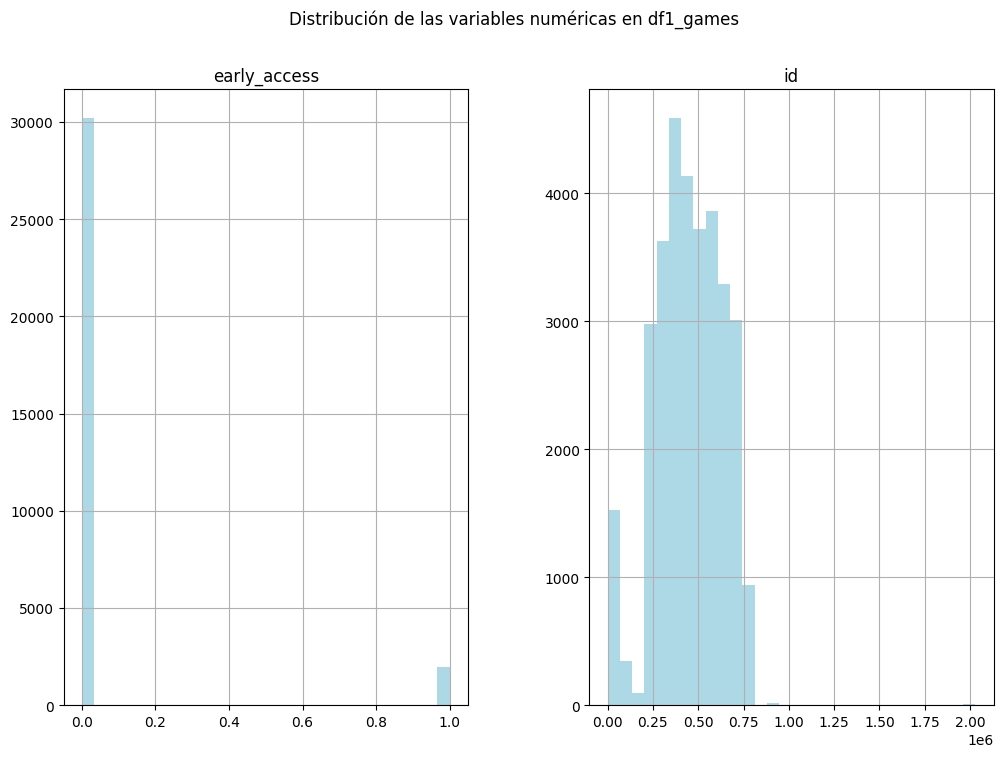

In [11]:
df1_games.hist(bins=30, color='lightblue', figsize=(12, 8))
plt.suptitle("Distribución de las variables numéricas en df1_games")
plt.show()

In [ ]:
df3_reviews.hist(bins=30, color='lightgreen', figsize=(12, 8))
plt.suptitle("Distribución de las variables numéricas en df3_reviews")
plt.show()

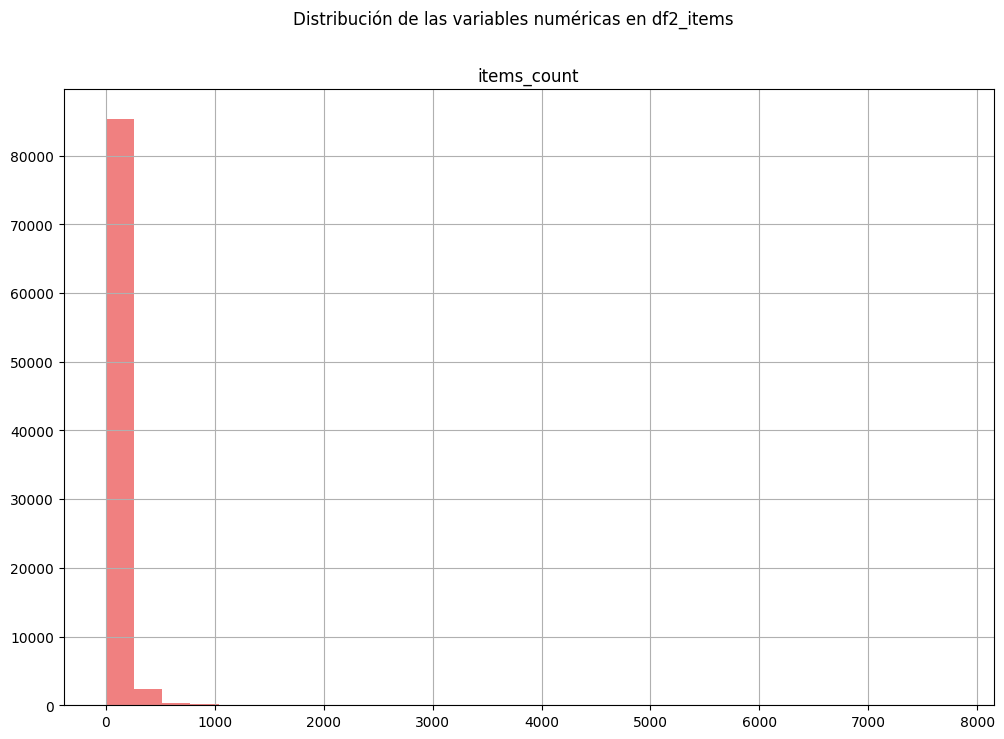

In [13]:
df2_items.hist(bins=30, color='lightcoral', figsize=(12, 8))
plt.suptitle("Distribución de las variables numéricas en df2_items")
plt.show()

### Análisis de correlación bivariado

In [ ]:
corr_matrix_games = df1_games.corr()
print("\nMatriz de correlación de df_games:")
print(corr_matrix_games)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_games, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de calor de la matriz de correlación en df1_games")
plt.show()


In [ ]:
corr_matrix_games = df3_reviews.corr()
print("\nMatriz de correlación de df_games:")
print(corr_matrix_games)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_games, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de calor de la matriz de correlación en df3_reviews")
plt.show()


In [ ]:
corr_matrix_games = df2_items.corr()
print("\nMatriz de correlación de df_games:")
print(corr_matrix_games)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix_games, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de calor de la matriz de correlación en df2_items")
plt.show()


### Análsis de correlación multivariado

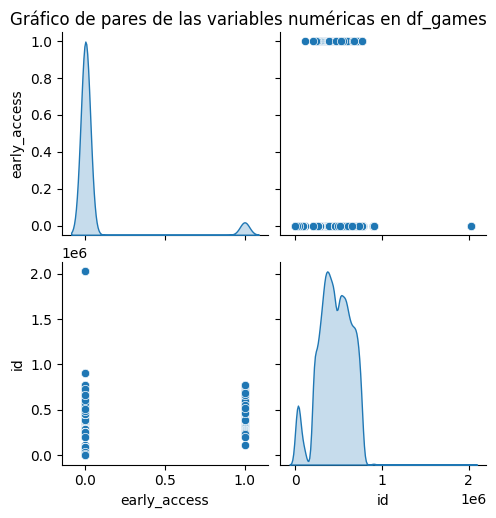

In [17]:
sns.pairplot(df1_games.select_dtypes(include=np.number), diag_kind='kde')
plt.suptitle("Gráfico de pares de las variables numéricas en df_games", y=1.02)
plt.show()

In [ ]:
sns.pairplot(df3_reviews.select_dtypes(include=np.number), diag_kind='kde')
plt.suptitle("Gráfico de pares de las variables numéricas en df_reviews", y=1.02)
plt.show()

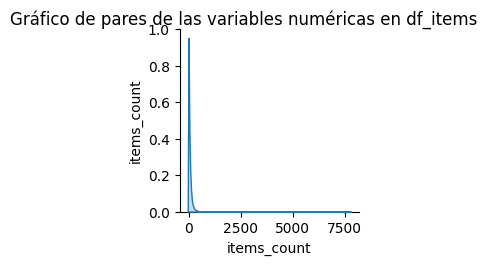

In [19]:
sns.pairplot(df2_items.select_dtypes(include=np.number), diag_kind='kde')
plt.suptitle("Gráfico de pares de las variables numéricas en df_items", y=1.02)
plt.show()